## 16/02/26: Estudar casos em que há uma troca de sinal


Bibliotecas necessárias:

In [2]:
import mpmath as mp
import matplotlib.pyplot as plt

Precisão utilizada:

In [9]:
mp.mp.dps = 500

Fórmula de Stirling:

In [10]:
def stirling(n):
    n = mp.mpf(n)
    return mp.sqrt(mp.mpf(2) * mp.pi * n) * (n / mp.e) ** n

Fórmula testada:

In [64]:
def stirlingD(n):
    n = mp.mpf(n)
    return mp.mpf(stirling(n) * ((mp.mpf(1)/mp.e)*((mp.mpf(1)+mp.mpf(1)/n)**(n+mp.mpf(1/2))))**(n+mp.mpf(1)+mp.mpf(1)/(mp.mpf(15)*(n+mp.mpf(1/2)+(mp.mpf(0.22211)/(n+mp.euler))))))

In [ ]:
Gerando gráfico de comparação:
+1 indica que a função gamma é maior do que a função testada
-1 indica que a função gamma é menor do que a função testada

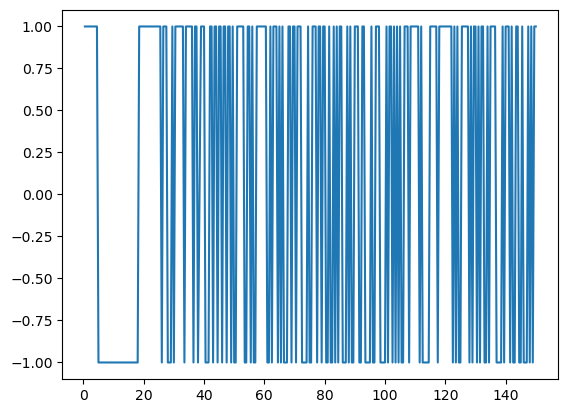

In [65]:
a = 0
x = []
y = []
for i in range(300):
    a = a + 0.5
    x.append(a)
    b = mp.gamma(a+1) - stirlingD(a)
    if(b<0):
        y.append(-1)
    else:
        if(b!=0):
            y.append(1)
        else:
            y.append(0)
plt.plot(x, y)
plt.show()

Função auxiliar para encontrar raízes

In [66]:
def diferenca(x):
    x = mp.mpf(x)
    return mp.gamma(x+1) - stirlingD(x)

Função que encontra raízes (momento em que a função gamma e a função testada tem aproximadamente o mesmo valor)

In [71]:
def bissecao(a, b, tol=mp.mpf(1e-25), max_iter=100000):
    """
    Parâmetros:
        a, b     : limites do intervalo (mpf)
        tol      : tolerância para o erro (mpf)
        max_iter : número máximo de iterações (int)
    
    Retorna:
        raiz (float) ou None se não encontrar
    """

    # Verifica se há mudança de sinal no intervalo
    if diferenca(a) * diferenca(b) > 0:
        #"Erro: f(a) e f(b) devem ter sinais opostos."
        return None

    for i in range(max_iter):
        m = mp.mpf((a + b) / 2)  # ponto médio
        fm = diferenca(m)

        # Verifica se encontrou a raiz ou se o intervalo é pequeno o suficiente
        if abs(fm) < tol or (b - a) / 2 < tol:
            return m

        # Decide qual subintervalo manter
        if diferenca(a) * fm < 0:
            b = m
        else:
            a = m

    print("Aviso: número máximo de iterações atingido.")
    return mp.mpf((a + b) / 2)

In [73]:
bissecao(18, 19)

Aviso: número máximo de iterações atingido.


mpf('18.492185592649321')

In [44]:
mp.gamma(18.7396144866943+1)

mpf('56225605072452392.0')

In [45]:
stirlingD(18.7396144866943)

mpf('56225605072453448.0')

In [48]:
diferenca(18.7396144866943)

mpf('-1056.0')

In [51]:
diferenca(18.7396191805601)

mpf('920.0')

In [54]:
diferenca(18.7396191804874)

mpf('-1744.0')

In [57]:
diferenca(18.7396191804873)

mpf('-528.0')

In [70]:
diferenca(18.4921855926493)

mpf('-1480.0')

In [74]:
diferenca(18.492185592649321)

mpf('24.0')